In [1]:
cd  /blue/adamginsburg/adamginsburg/SPICY_ALMAIMF/notebooks

/blue/adamginsburg/adamginsburg/SPICY_ALMAIMF/notebooks


In [2]:
cd ..

/blue/adamginsburg/adamginsburg/SPICY_ALMAIMF


In [3]:
import imp, table_loading
imp.reload(table_loading)

<module 'table_loading' from '/blue/adamginsburg/adamginsburg/SPICY_ALMAIMF/table_loading.py'>

In [4]:
from table_loading import *

In [5]:
cd /blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF

/blue/adamginsburg/adamginsburg/SPICY_ALMAIMF


In [6]:
tbl = Table.read('SPICY_withAddOns.fits')

In [7]:
# wavelength, flux, eflux, aperture
data = [
    [0.9, 0.062, 0.019, 24],
    [1.25, 2.2, 0.2, 12],
    [1.65, 8.2, 0.8, 12],
    [2.20, 17.1, 1.7, 12],
    [3.6, 18.3, 0.8, 12],
    [4.5, 17.0, 0.8, 12],
    [4.6, 17.96, 0.5, 12],
    [5.8, 12.5, 0.7, 12],
    [8.0, 6.8, 0.5, 12],
    [11.6, 4.5, 0.5, 8],
    [24, 160.6, 16.0, 30],
    [65, 4398, 274, 90],
    [70, 5555, 1000, 120],
    [100, 11000, 3000, 125],
    [160, 19000, 4000, 80],
    [250, 23700, 5000, 90],
    [350, 15000, 3000, 90],
    [450, 6700, 2500, 60],
    [500, 6200, 2000, 90],
    [850, 1000, 300, 60],
    [1110, 238, 45, 5],
    [1300, 120, 30, 5],
    [2900, 14.5, 3.0, 5],
    [8100, 1.10, 0.15, 5],
    [10300, 0.65, 0.1, 5],
    [40000, 0.05, 0.01, 5],
    [64000, 0.047, 0.02, 5],
]

In [8]:
cb26tbl = Table(rows=data,
                names=['wavelength', 'flux', 'eflux', 'aperture'],
                units=(u.um, u.mJy, u.mJy, u.arcsec)
               )
cb26tbl

wavelength,flux,eflux,aperture
um,mJy,mJy,arcsec
float64,float64,float64,int64
0.9,0.062,0.019,24
1.25,2.2,0.2,12
1.65,8.2,0.8,12
2.2,17.1,1.7,12
3.6,18.3,0.8,12
4.5,17.0,0.8,12
4.6,17.96,0.5,12
5.8,12.5,0.7,12


In [9]:
cb26tbl['aperture'].quantity

<Quantity [ 24,  12,  12,  12,  12,  12,  12,  12,  12,   8,  30,  90, 120,
           125,  80,  90,  90,  60,  90,  60,   5,   5,   5,   5,   5,   5,
             5] arcsec>

In [10]:
fit = fit_a_source(data=cb26tbl['flux'],#.quantity,
             error=cb26tbl['eflux'],#.quantity,
             valid=np.ones(len(cb26tbl)), aperture_size=cb26tbl['aperture'].quantity,
             filters=cb26tbl['wavelength'].quantity,
                   av_range=[1,30],
                   distance_range=[90,150]*u.pc,
                  )

 ------------------------------------------------------------
  => Model parameters
 ------------------------------------------------------------

   Models              :  s-ubhmi
   Log[d] stepping     :  0.02
   Number of distances :  13

 ------------------------------------------------------------
  => Reading in convolved fluxes
 ------------------------------------------------------------



   Reading fluxes at 0.9 um
   Reading fluxes at 1.25 um
   Reading fluxes at 1.65 um
   Reading fluxes at 2.2 um
   Reading fluxes at 3.6 um
   Reading fluxes at 4.5 um
   Reading fluxes at 4.6 um
   Reading fluxes at 5.8 um
   Reading fluxes at 8.0 um
   Reading fluxes at 11.6 um
   Reading fluxes at 24.0 um
   Reading fluxes at 65.0 um
   Reading fluxes at 70.0 um
   Reading fluxes at 100.0 um
   Reading fluxes at 160.0 um
   Reading fluxes at 250.0 um
   Reading fluxes at 350.0 um
   Reading fluxes at 450.0 um
   Reading fluxes at 500.0 um
   Reading fluxes at 850.0 um
   Reading fluxes at 1110.0 um
   Reading fluxes at 1300.0 um
   Reading fluxes at 2900.0 um
   Reading fluxes at 8100.0 um
   Reading fluxes at 10300.0 um
   Reading fluxes at 40000.0 um
   Reading fluxes at 64000.0 um


In [11]:
import sedfitter
imp.reload(sedfitter)

<module 'sedfitter' from '/blue/adamginsburg/adamginsburg/repos/sedfitter/sedfitter/__init__.py'>

In [12]:
%matplotlib inline
import pylab as pl

In [13]:
fit.n_fits

90000

In [45]:
rslt = sedfitter.plot(fit, show_sed=True)
rslt

adding wav [4.83863172e+03 4.53135115e+03 4.24358464e+03 3.97409293e+03
 3.72171547e+03 3.48536542e+03 3.26402494e+03 3.05674083e+03
 2.86262044e+03 2.68082780e+03 2.51058002e+03 2.35114394e+03
 2.20183296e+03 2.06200407e+03 1.93105511e+03 1.80842215e+03
 1.69357708e+03 1.58602533e+03 1.48530372e+03 1.39097850e+03
 1.30264347e+03 1.21991822e+03 1.14244649e+03 1.06989465e+03
 1.00195027e+03 9.38320744e+02 8.78732052e+02 8.22927580e+02
 7.70667009e+02 7.21725280e+02 6.75891629e+02 6.32968675e+02
 5.92771572e+02 5.55127213e+02 5.19873485e+02 4.86858568e+02
 4.55940286e+02 4.26985491e+02 3.99869489e+02 3.74475507e+02
 3.50694187e+02 3.28423116e+02 3.07566384e+02 2.88034174e+02
 2.69742369e+02 2.52612198e+02 2.36569890e+02 2.21546359e+02
 2.07476908e+02 1.94300947e+02 1.81961734e+02 1.70406131e+02
 1.59584375e+02 1.49449862e+02 1.39958947e+02 1.31070760e+02
 1.22747023e+02 1.14951890e+02 1.07651793e+02 1.00815293e+02
 9.44129499e+01 8.84171918e+01 8.28021983e+01 7.75437888e+01
 7.26193182e+

{'': {'source': <sedfitter.source.source.Source at 0x2b6d6cf6e280>,
  'filters': [{'aperture_arcsec': 24.0, 'wav': <Quantity 0.9 um>},
   {'aperture_arcsec': 12.0, 'wav': <Quantity 1.25 um>},
   {'aperture_arcsec': 12.0, 'wav': <Quantity 1.65 um>},
   {'aperture_arcsec': 12.0, 'wav': <Quantity 2.2 um>},
   {'aperture_arcsec': 12.0, 'wav': <Quantity 3.6 um>},
   {'aperture_arcsec': 12.0, 'wav': <Quantity 4.5 um>},
   {'aperture_arcsec': 12.0, 'wav': <Quantity 4.6 um>},
   {'aperture_arcsec': 12.0, 'wav': <Quantity 5.8 um>},
   {'aperture_arcsec': 12.0, 'wav': <Quantity 8. um>},
   {'aperture_arcsec': 8.0, 'wav': <Quantity 11.6 um>},
   {'aperture_arcsec': 30.0, 'wav': <Quantity 24. um>},
   {'aperture_arcsec': 90.0, 'wav': <Quantity 65. um>},
   {'aperture_arcsec': 120.0, 'wav': <Quantity 70. um>},
   {'aperture_arcsec': 125.0, 'wav': <Quantity 100. um>},
   {'aperture_arcsec': 80.0, 'wav': <Quantity 160. um>},
   {'aperture_arcsec': 90.0, 'wav': <Quantity 250. um>},
   {'aperture_arcse

In [46]:
rslt['']['lines'].get_array()

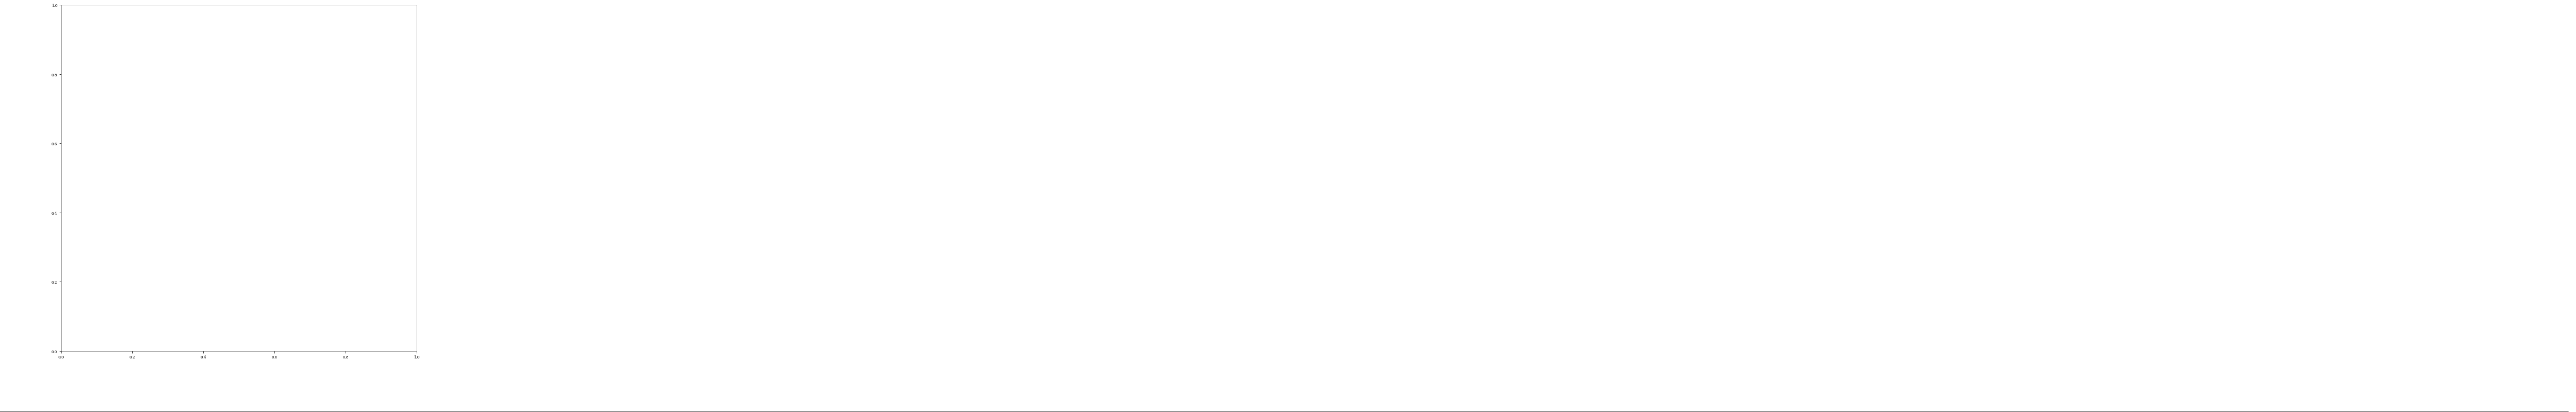

In [47]:
pl.figure(figsize=(12,12))
ax = pl.gca()
ax.lines.append(rslt['']['lines'])

In [48]:
fit.meta.filters[0]

{'aperture_arcsec': 24.0, 'wav': <Quantity 0.9 um>}

In [72]:
fit.source.valid

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [108]:
pl.style.use('dark_background')

In [109]:
%run plot_fit.py

<Figure size 432x288 with 0 Axes>

-0.916345719951134
[8.2440394e-01 9.4103664e-01 1.0135115e+00 5.5000544e-01 2.5788343e-01
 2.7448297e-01 2.7448297e-01 3.1789541e-01 2.1767455e-01 7.5458005e-02
 1.0744551e+00 9.9869965e+01 1.1573292e+02 2.1258835e+02 4.5025458e+02
 7.5777856e+02 6.3788605e+02 4.4162219e+02 3.9296851e+02 1.1917116e+02
 5.1562500e+00 3.4057524e+00 2.4142914e-01 3.7976027e-02 3.7976027e-02
 3.7976027e-02 3.7976027e-02]
(<Quantity [1.19026442e-02, 3.45020090e-02, 5.63698579e-02, 4.12646588e-02,
           3.12663876e-02, 3.32789533e-02, 3.32789533e-02, 3.85423787e-02,
           2.63913702e-02, 9.14870389e-03, 1.30269438e-01, 1.21084671e+01,
           1.40317287e+01, 2.57747059e+01, 5.45899124e+01, 9.18748398e+01,
           7.73387909e+01, 5.35433044e+01, 4.76444168e+01, 1.44485884e+01,
           6.25155747e-01, 4.12921369e-01, 2.92714313e-02, 4.60430188e-03,
           4.60430188e-03, 4.60430188e-03, 4.60430188e-03]>,)
-0.916345719951134
0.0 mJy 214.76812744140625 mJy


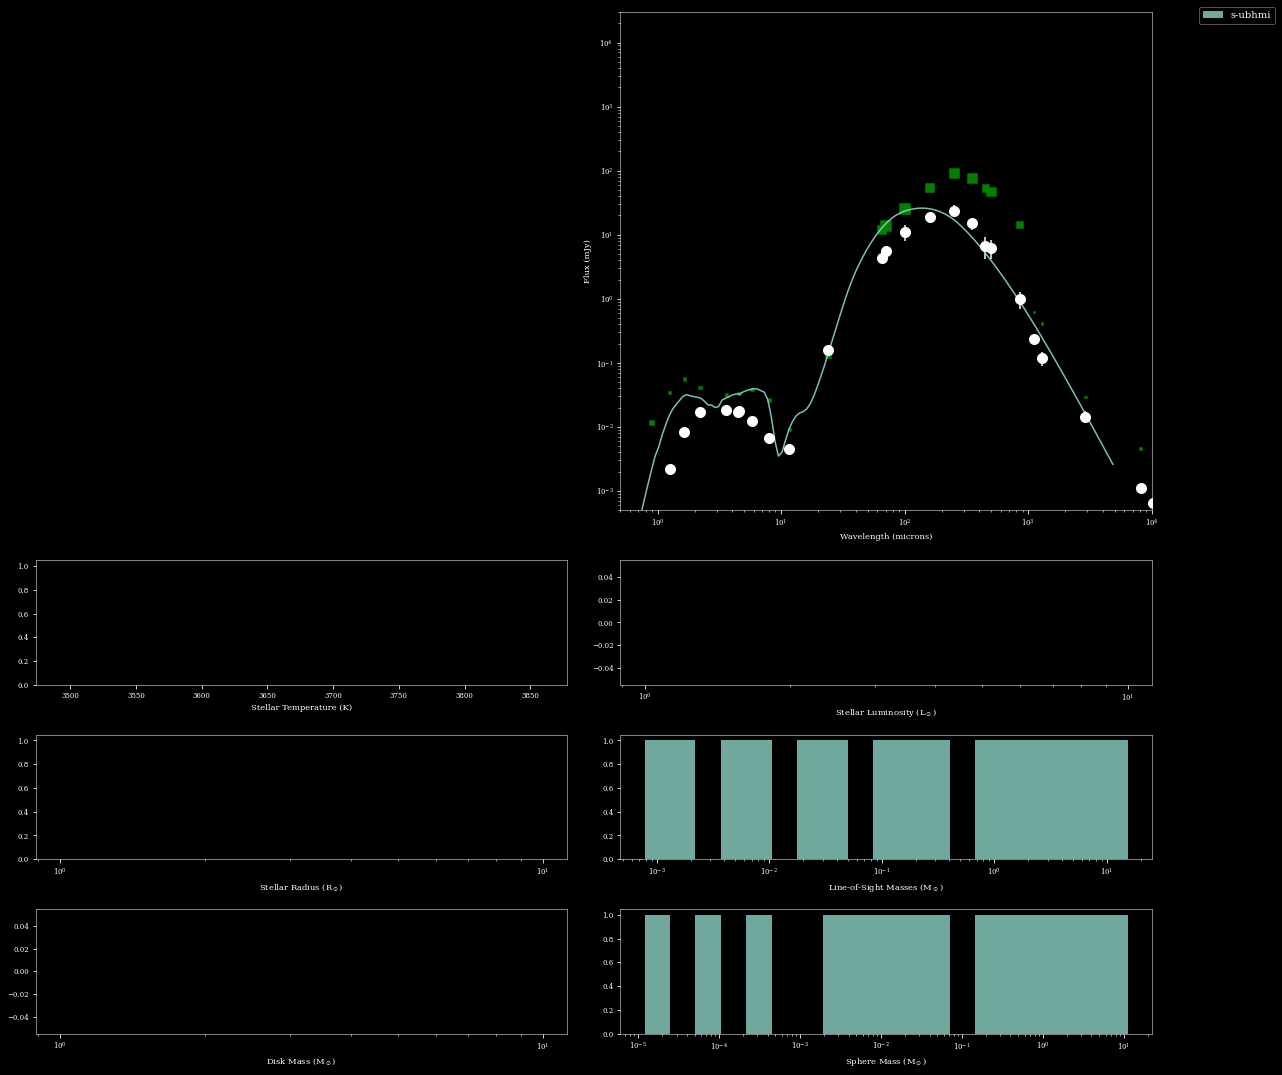

In [110]:
plot_fit({'s-ubhmi': fit}, ['s-ubhmi'], chi2limit=100)